In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show all columns
pd.set_option('display.max_columns', None)

In [ ]:
zillow_7d = pd.read_excel('Listings_Philadelphia_7d.xlsx')
zillow_7d_raw = zillow_7d.copy()

zillow_7d.head()

,dateSold,propertyType,lotAreaValue,address,variableData,priceChange,zestimate,imgSrc,price,detailUrl,bedrooms,contingentListingType,longitude,latitude,listingStatus,zpid,rentZestimate,daysOnZillow,bathrooms,livingArea,country,currency,lotAreaUnit,hasImage,listingSubType.is_FSBA,unit,variableData.text,variableData.type,listingSubType.is_comingSoon,listingSubType.is_forAuction,listingSubType.is_openHouse
0,NaN,TOWNHOUSE,1901.000000,"7012 Charles St, Philadelphia, PA 19135",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/950bbb8bb25...,239900,/homedetails/7012-Charles-St-Philadelphia-PA-1...,3,NaN,-75.045715,40.033440,FOR_SALE,10510325,NaN,2,2.0,1350,USA,USD,sqft,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,SINGLE_FAMILY,5000.000000,"321 Fanshawe St, Philadelphia, PA 19111",NaN,NaN,293500.0,https://photos.zillowstatic.com/fp/84335bedc75...,299000,/homedetails/321-Fanshawe-St-Philadelphia-PA-1...,3,NaN,-75.095290,40.054493,FOR_SALE,10359691,1544.0,4,2.0,1600,USA,USD,sqft,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,SINGLE_FAMILY,8816.000000,"9527 Northeast Ave, Philadelphia, PA 19115",NaN,NaN,419500.0,https://photos.zillowstatic.com/fp/1b9ec357e0c...,425000,/homedetails/9527-Northeast-Ave-Philadelphia-P...,3,NaN,-75.041280,40.090378,FOR_SALE,10528174,2400.0,4,2.0,2082,USA,USD,sqft,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,TOWNHOUSE,1717.000000,"2013 74th Ave, Philadelphia, PA 19138",NaN,NaN,265300.0,https://photos.zillowstatic.com/fp/a4be2ae3c4e...,269000,/homedetails/2013-74th-Ave-Philadelphia-PA-191...,4,NaN,-75.150970,40.067673,FOR_SALE,10219020,1999.0,2,2.0,1516,USA,USD,sqft,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,SINGLE_FAMILY,0.867769,"8760 Stenton Ave, Philadelphia, PA 19118",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/b89f1d885c5...,895000,/homedetails/8760-Stenton-Ave-Philadelphia-PA-...,9,NaN,-75.206030,40.082480,FOR_SALE,118349208,NaN,4,8.0,7119,USA,USD,acres,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
zillow_7d.columns

Index(['dateSold', 'propertyType', 'lotAreaValue', 'address', 'variableData',
       'priceChange', 'zestimate', 'imgSrc', 'price', 'detailUrl', 'bedrooms',
       'contingentListingType', 'longitude', 'latitude', 'listingStatus',
       'zpid', 'rentZestimate', 'daysOnZillow', 'bathrooms', 'livingArea',
       'country', 'currency', 'lotAreaUnit', 'hasImage',
       'listingSubType.is_FSBA', 'unit', 'variableData.text',
       'variableData.type', 'listingSubType.is_comingSoon',
       'listingSubType.is_forAuction', 'listingSubType.is_openHouse'],
      dtype='object')

In [ ]:
interesting_columns = [
       'zpid', 'detailUrl', 'propertyType','address',
       'price', 'zestimate', 'rentZestimate', 'daysOnZillow','bedrooms',
       'lotAreaValue', 'lotAreaUnit', 'bathrooms',  'livingArea',
       'longitude', 'latitude'
]

zillow_7d = zillow_7d[interesting_columns]

In [ ]:
zillow_7d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zpid           41 non-null     int64  
 1   detailUrl      41 non-null     object 
 2   propertyType   41 non-null     object 
 3   address        41 non-null     object 
 4   price          41 non-null     int64  
 5   zestimate      29 non-null     float64
 6   rentZestimate  37 non-null     float64
 7   daysOnZillow   41 non-null     int64  
 8   bedrooms       41 non-null     int64  
 9   lotAreaValue   40 non-null     float64
 10  lotAreaUnit    40 non-null     object 
 11  bathrooms      40 non-null     float64
 12  livingArea     41 non-null     int64  
 13  longitude      41 non-null     float64
 14  latitude       41 non-null     float64
dtypes: float64(6), int64(5), object(4)
memory usage: 4.9+ KB


In [ ]:
zillow_7d.shape

(41, 15)

In [ ]:
zillow_7d.describe()

,zpid,price,zestimate,rentZestimate,daysOnZillow,bedrooms,lotAreaValue,bathrooms,livingArea,longitude,latitude
count,4.100000e+01,41.000000,29.000000,37.000000,41.000000,41.000000,40.000000,40.000000,41.000000,41.000000,41.000000
mean,1.648963e+08,341187.731707,345596.551724,2051.162162,2.243902,3.658537,2350.440950,2.375000,1803.317073,-75.127901,40.025685
std,5.468305e+08,172745.058615,162108.857788,873.644204,1.881229,1.334349,2104.341390,1.125178,1055.532127,0.085718,0.049700
min,1.017464e+07,35000.000000,131200.000000,1300.000000,-1.000000,2.000000,0.290037,1.000000,956.000000,-75.263084,39.912544
25%,1.028464e+07,235000.000000,239900.000000,1544.000000,1.000000,3.000000,1047.500000,2.000000,1314.000000,-75.194220,39.999107
50%,1.035970e+07,299900.000000,293500.000000,1814.000000,2.000000,3.000000,1653.000000,2.000000,1520.000000,-75.150970,40.034817
75%,1.052624e+07,385000.000000,419500.000000,2297.000000,4.000000,4.000000,2898.000000,3.000000,1917.000000,-75.046425,40.060947
max,2.123501e+09,895000.000000,810900.000000,6259.000000,7.000000,9.000000,9370.000000,8.000000,7119.000000,-74.964680,40.096527


In [ ]:
len(zillow_7d[zillow_7d['lotAreaUnit'] == 'acres'])

2

In [ ]:
def convert_acres_to_sqft(row):
    if row['lotAreaUnit'] == 'acres':
        return row['lotAreaValue'] * 43560
    else:
        return row['lotAreaValue']

zillow_7d['lotAreaValue'] = zillow_7d.apply(convert_acres_to_sqft, axis=1)
zillow_7d.loc[zillow_7d['lotAreaUnit'] == 'acres']['lotAreaUnit'] = 'sqft'

<ipython-input-21-7109aaf6a97f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_7d.loc[zillow_7d['lotAreaUnit'] == 'acres']['lotAreaUnit'] = 'sqft'


In [ ]:
zillow_7d  = zillow_7d[~zillow_7d['rentZestimate'].isna()]
zillow_7d  = zillow_7d.query('daysOnZillow != -1')
zillow_7d['CapRate'] = (zillow_7d['rentZestimate']*12) / zillow_7d['price']
zillow_7d['PriceSqft'] = zillow_7d['price'] / zillow_7d['lotAreaValue']
zillow_7d['price/Zestimate'] = zillow_7d['price'] / zillow_7d['zestimate']
zillow_7d.head(3)

,zpid,detailUrl,propertyType,address,price,zestimate,rentZestimate,daysOnZillow,bedrooms,lotAreaValue,lotAreaUnit,bathrooms,livingArea,longitude,latitude,CapRate,PriceSqft,price/Zestimate
1,10359691,/homedetails/321-Fanshawe-St-Philadelphia-PA-1...,SINGLE_FAMILY,"321 Fanshawe St, Philadelphia, PA 19111",299000,293500.0,1544.0,4,3,5000.0,sqft,2.0,1600,-75.09529,40.054493,0.061967,59.800000,1.018739
2,10528174,/homedetails/9527-Northeast-Ave-Philadelphia-P...,SINGLE_FAMILY,"9527 Northeast Ave, Philadelphia, PA 19115",425000,419500.0,2400.0,4,3,8816.0,sqft,2.0,2082,-75.04128,40.090378,0.067765,48.207804,1.013111
3,10219020,/homedetails/2013-74th-Ave-Philadelphia-PA-191...,TOWNHOUSE,"2013 74th Ave, Philadelphia, PA 19138",269000,265300.0,1999.0,2,4,1717.0,sqft,2.0,1516,-75.15097,40.067673,0.089175,156.668608,1.013946


In [ ]:
zillow_7d.describe()

,zpid,price,zestimate,rentZestimate,daysOnZillow,bedrooms,lotAreaValue,bathrooms,livingArea,longitude,latitude,CapRate,PriceSqft,price/Zestimate
count,3.300000e+01,33.000000,26.000000,33.000000,33.000000,33.000000,32.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,26.000000
mean,7.274696e+07,322163.545455,336942.307692,2064.030303,2.606061,3.575758,3576.406250,2.181818,1691.272727,-75.125113,40.024770,0.091135,150.580107,1.024646
std,3.582763e+08,151884.227019,159065.448600,900.481520,1.675921,1.118881,4212.240572,0.682575,685.337657,0.084289,0.049640,0.068955,119.667241,0.067071
min,1.019497e+07,35000.000000,131200.000000,1300.000000,1.000000,2.000000,651.000000,1.000000,956.000000,-75.263084,39.912544,0.039659,26.985351,0.916632
25%,1.028174e+07,219900.000000,237200.000000,1595.000000,1.000000,3.000000,1288.750000,2.000000,1184.000000,-75.180100,39.999107,0.066923,95.956806,1.009160
50%,1.035969e+07,299000.000000,288050.000000,1814.000000,3.000000,3.000000,1740.000000,2.000000,1516.000000,-75.140790,40.035110,0.079306,140.789517,1.016436
75%,1.050697e+07,385000.000000,408475.000000,2297.000000,4.000000,4.000000,4347.000000,3.000000,1917.000000,-75.046425,40.060947,0.094475,173.228457,1.023833
max,2.068520e+09,795000.000000,810900.000000,6259.000000,7.000000,8.000000,20917.000000,4.000000,4352.000000,-74.970310,40.096527,0.462171,706.605223,1.333841


<ipython-input-39-0df610eb0c43>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1);
<ipython-input-39-0df610eb0c43>:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=zillow_7d, x='propertyType', y='CapRate', s=9, palette='bright', alpha=0.7, ec='k');


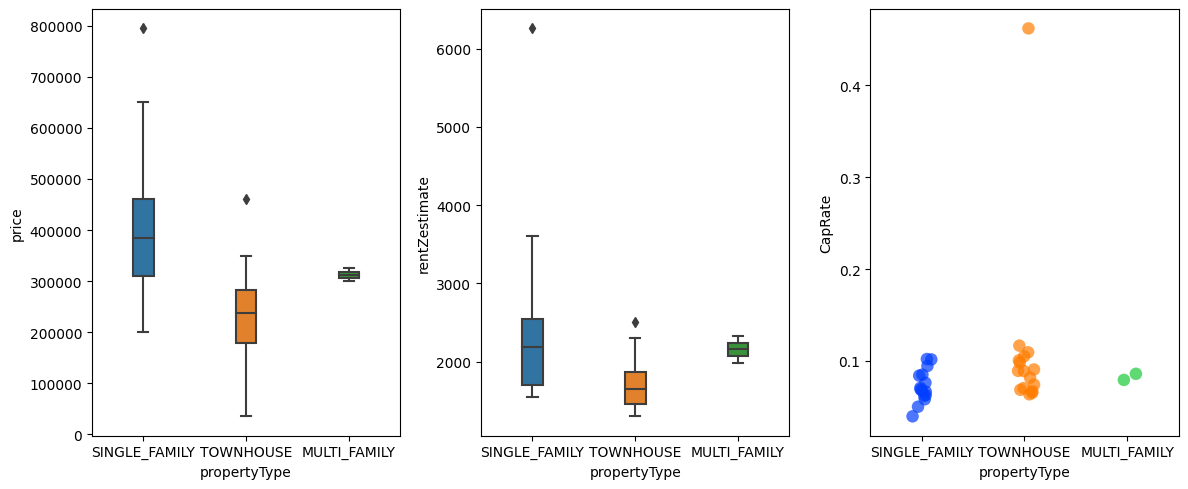

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
plt.subplot(1,3,1);
sns.boxplot(data=zillow_7d, x='propertyType', y='price', width=0.2);
plt.subplot(1,3,2);
sns.boxplot(data=zillow_7d, x='propertyType', y='rentZestimate', width=0.2);
plt.subplot(1,3,3);
sns.stripplot(data=zillow_7d, x='propertyType', y='CapRate', s=9, palette='bright', alpha=0.7, ec='k');
plt.tight_layout();

In [ ]:
zillow_7d.to_excel('zillow_7d_clean.xlsx', index=False)